# Exploratory Text Mining

This analysis deals with the alleged **negative value-bias of corporate governance (cg) of german public companies**. In this first series (part-1), we kick things off by exploring most relevant text tokens, which characterize cg-research activities of the last ten years.

A significant part of the scientific research is predominantly concerned with the topics of compliance and risk avoidance. Accordingly, value orientation and the preservation of a **capital value-optimizing investment policy by the supervisory board are left in the background**. Since these hypotheses could be considered qualitative, we will use the method of **bibliometric analysis** to support our view in this article.

In line with our own quality standards and the aim of collecting transparent and robust analytical results of international corporate governance research, only **peer-reviewed journals** were taken into account. A total of 29 national and international journals were included in the analysis over a time horizon of ten years (2011 to 2020). As a result, the total database comprises 530 scientific papers in English.

 In this exploratory analysis, a word cloud is generated and word frequencies are determined. A compact visualization of large amounts of text generated by a word cloud helps to develop the meaning of central keywords and to highlight what recent research is aiming at. 

## 1) Data Preparation

First and foremost, we must install the required python libraries to import the dataset that comprises 530 abstracts of english research papers.

Once, we have the technical tools at hand, we are able to import the .csv-file and perform our analysis

### 1a) Import Libraries

The **`numpy`** library is one of the most popular and helpful libraries that is used for handling multi-dimensional arrays and matrices. It is also used in combination with **`Pandas`** library to perform data analysis.

For visualization, **`matplotlib`** is a basic library that enables many other libraries to run and plot on its base including **`seaborn`** or **`wordcloud`**. The **`pillow`** library is a package that enables image reading. Its tutorial can be found here. Pillow is a wrapper for PIL - Python Imaging Library. You will need this library to read in image as the mask for the wordcloud.
**`wordcloud`** can be a little tricky to install. If you only need it for plotting a basic wordcloud, then pip install wordcloud or conda install -c conda-forge wordcloud would be sufficient.

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

### 1b) Import Raw Data

In [ ]:
# Import dataframe
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfolio_Projects/03_PhD_Analysen/04_NLP_CG_VBM/Rohdaten_0603.csv", sep = ";", index_col = 0, error_bad_lines=False)

# View first rows
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Journal  \
No.                                     
1         Management Review Quarterly   
2         Management Review Quarterly   
3    Journal of Economics and Finance   
4    Journal of Economics and Finance   
5    Journal of Economics and Finance   

                                                 Title  Year  \
No.                                                            
1    Determinants and effects of sustainable CEO co...  2019   
2    A governance puzzle to be solved? A systematic...  2020   
3    The analysis of corporate governance policy an...  2016   
4    The impact of governance characteristics on th...  2014   
5    Board independence and market reactions around...  2011   

                                              Abstract  
No.                                                     
1    Sustainability-oriented CEO compensation is be...  
2    To address global sustainability challenges, a...  
3    The main purpose of this study is to investiga...  
4    The study examines the relationship between th...  
5    This study focuses on whether board independen...

### 1c) Inspect the Dataframe

In [ ]:
# Get the number of unique journals
unique = df["Journal"].nunique()
print(f"There are {unique} peer reviewed journals")

There are 29 peer reviewed journals


In [ ]:
# Get number of articels in per journal
df["Journal"].value_counts()

Corporate Governance: An International Review         123
Journal of Management and Governance                   78
International Journal of Disclosure And Governance     39
Journal of Management                                  35
Strategic Management Journal                           35
British Journal of Management                          32
Managerial and Decision Economics                      27
Journal of Management Studies                          19
BRQ Business Research Quarterly                        17
Review of Managerial Science                           15
European Management Review                             13
International Studies of Management & Organization     12
International Journal of Management Reviews            12
Journal of Economics and Finance                       11
Journal of Business Economics and Management           11
Cogent Business & Management                            8
Journal of International Business Studies               6
Journal of Gen

In [ ]:
# Get number of total articles
print(f"There are {df.shape[0]} observations and {df.shape[1]} attributes in the dataframe")

There are 530 observations and 4 attributes in the dataframe


## 2) Text-Preprocessing

NLTK consists of the most common algorithms such as tokenizing, part-of-speech tagging, stemming, sentiment analysis, topic segmentation, and named entity recognition. NLTK helps the computer to analysis, preprocess, and understand the written text.

In [ ]:
# Import nltk library
import nltk

# Download Punkt Tokenizer package
nltk.download("punkt")

# Create one string by combining all abstracts
abstracts = " ".join(abstract for abstract in df.Abstract)
print ("There are {} words in the combination of all abstracts.".format(len(abstracts)))

# Inspect abstracts
abstracts


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
There are 687159 words in the combination of all abstracts.


'Sustainability-oriented CEO compensation is being widely discussed among policy makers corporate practice and academia. To date management literature has yielded a growing body of empirical results on the determinants and effects of sustainable CEO compensation. Primarily empirical studies analyze whether and to what extent sustainability-related issues determine the design of sustainable CEO compensation and how sustainability-oriented CEO compensation impacts corporate performance. However the scattered nature of this research field has impeded an overarching empirical substantiation of the arguments in favor or against a sustainable CEO compensation. This structured literature review addresses this gap by analyzing 37 empirical studies on the key determinants and effects of sustainable CEO compensation. Using a multi-level analysis we contribute to the discussion on sustainable CEO compensation by systematically identifying the central empirical insights and methodological and cont

### 2a) Tokenization


Tokenization is the first step in text analytics. The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization.
  - **`sent_tokenize(text`**): breaks text paragraph into sentences
  - **`word_tokenize(text)`**: breaks text paragraph into words

**Sentence Tokenization**

In [ ]:
# Import tokenization packages
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

# Split the all 103 abstracts into sentences
abstracts_sent = sent_tokenize(abstracts)

# View third sentence
abstracts_sent[3]

'However the scattered nature of this research field has impeded an overarching empirical substantiation of the arguments in favor or against a sustainable CEO compensation.'

**Word Tokenization**

In [ ]:
# Split all 103 abstracts into words
abstracts_word = word_tokenize(abstracts)

# Select third word of all abstracts
abstracts_word[:10]

['Sustainability-oriented',
 'CEO',
 'compensation',
 'is',
 'being',
 'widely',
 'discussed',
 'among',
 'policy',
 'makers']

### 2b) Lowercasing

Capitalization and Lowercase is considered as noise in the text. Therefore, we remove capital letters and lowercase each and every token.


In [ ]:
# Create a lowercased abstract list for each word (token) in tokenized abstracts_word list
lo_abstracts = [token.lower() for token in abstracts_word]

# Print 5th element of the lowercase abstracts-list
lo_abstracts[:10]

['sustainability-oriented',
 'ceo',
 'compensation',
 'is',
 'being',
 'widely',
 'discussed',
 'among',
 'policy',
 'makers']

### 2c) Remove Stopwords

Stopwords are considered as noise in the text. We need to create a list of stopwords and filter out our list of tokens from these words.


In [ ]:
# Import and download "stopwords" package
from nltk.corpus import stopwords
nltk.download("stopwords")

# Import standardized list from NLTK
stop_words = set(stopwords.words("english")) 

# Append stopword-list with corporate governance specific terminologies
stop_words.update(["Corporate", "Governance", "corporate", "governance", "the", "CEO", "level", "find", "findings", "related", "paper", "listed", "CG", "effect", 
            "finding", "result", "study", "boards", "based", "board", "Board", "firm", "firms", "family", "performance", "director", "directors", "companies",
            "member", "results", "sample", "suggest", "show", "literature", "research", "model", "management", "article", "one", ".", ",", "(", ")", "The", "We", "In"
            "-", "This", "'", "Our", "’", "In", "also", "evidence", "empirical", "better", "high", "use", "may", "using", "financial", "relationship", "different", 
            "whether", "effects", "data", "new", "country", "institutional", "executive"])

# Print stop_words
print(f"First words of the Stopwords-dict: {stop_words}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
First words of the Stopwords-list: {'it', 'o', "that'll", 'theirs', 'firms', 'firm', 'directors', 'The', 'all', 'doesn', 'further', 'Corporate', 'also', 'haven', 'or', 'hers', 'when', 'financial', 'research', 'over', "it's", 'level', 'related', 'from', 'board', 'has', "isn't", 'he', 'needn', 'management', 'against', 'In', 'may', 'not', 'institutional', 'but', 'more', 'a', "hasn't", 'empirical', 'should', 'one', ')', 'having', 'finding', 'then', 'am', 'mightn', 'result', 'relationship', 'she', 'about', 'which', 'effects', 'once', 'being', 'after', ',', 'in', "shouldn't", 'article', 'use', 'same', 'won', 'can', 'was', 'are', 'CG', 'study', 'were', 'This', 'up', 'themselves', '’', "shan't", 'whom', 'nor', 'our', 'i', 'its', 'evidence', 'ma', 'where', 'his', 'any', 'myself', 'yourself', 'you', 'yourselves', 'some', 'didn', 'those', 'down', '.', 'be', 'no', 'shan', 'do', 'w

In [ ]:
# Filter Abstracts for stopwords and remove them
lofi_abstracts=[]
for token in lo_abstracts:
    if token not in stop_words:
        lofi_abstracts.append(token)
print("Tokenized Sentence:", lo_abstracts)
print("Filtered Sentence:", lofi_abstracts)

Tokenized Sentence: ['sustainability-oriented', 'ceo', 'compensation', 'is', 'being', 'widely', 'discussed', 'among', 'policy', 'makers', 'corporate', 'practice', 'and', 'academia', '.', 'to', 'date', 'management', 'literature', 'has', 'yielded', 'a', 'growing', 'body', 'of', 'empirical', 'results', 'on', 'the', 'determinants', 'and', 'effects', 'of', 'sustainable', 'ceo', 'compensation', '.', 'primarily', 'empirical', 'studies', 'analyze', 'whether', 'and', 'to', 'what', 'extent', 'sustainability-related', 'issues', 'determine', 'the', 'design', 'of', 'sustainable', 'ceo', 'compensation', 'and', 'how', 'sustainability-oriented', 'ceo', 'compensation', 'impacts', 'corporate', 'performance', '.', 'however', 'the', 'scattered', 'nature', 'of', 'this', 'research', 'field', 'has', 'impeded', 'an', 'overarching', 'empirical', 'substantiation', 'of', 'the', 'arguments', 'in', 'favor', 'or', 'against', 'a', 'sustainable', 'ceo', 'compensation', '.', 'this', 'structured', 'literature', 'review

### 2d) Normalize Text

Lexicon Normalization considers another type of noise in the text.
  - **Stemming:** is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes
  - **Lemmatization**: Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis


**The "wordnet" package:**

**WordNet** is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. Synsets are interlinked by means of conceptual-semantic and lexical relations

In [ ]:
# Import "wordnet" package
nltk.download("wordnet")

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()


# Retain only alphabetic words using .isalpha()
lofialph_abstracts = [wnl.lemmatize(token) for token in lofi_abstracts if token.isalpha()]

# View the numbers of lemmatized tokens
len(lofialph_abstracts)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


46042

## Text Preprocessing using SpaCy

Alternatively, we might use the SpaCy-library to perform text normalization. This library uses predefined english text corpus to split text into tokens.
We are able to consider tokens based on their part-of-speech tag (POS), stop_word-characteristic or distinguish between numeric and alphabetic tokens.

Some steps to consider when executing SpaCy:
1. Need to download new spacy model
2. Restart Runtim (Laufzeit)
3. Execute all Cells before
4. Create nlp objects



```
# Lemmatize with spacy
! python -m spacy download en_core_web_lg

import spacy
nlp = spacy.load('en_core_web_lg')

df["nlp_abstract"] = [nlp(abstract) for abstract in df["Abstract"]]

token_list = []
allowed_postags = ["NOUN", "ADV", "ADJ", "VERB", "PROPN"]

for abstract in df["nlp_abstract"]:
  for token in abstract:
    if token.is_alpha == True and token.pos_ in allowed_postags and token.is_stop == False:
      token_list.append(token.lemma_)
len(token_list)
#token_list[:100]
```



## 3) WordCloud Generation
 Word Cloud (tag cloud) is a visual representation of words of a text corpus, where word’s visual size is proportional to the frequency or importance of the word.

To start you must use the first observation description as the input for the wordcloud. The three steps are:
1. Extract the review (text document)
2. Create and generate a wordcloud image
3. Display the cloud using matplotlib

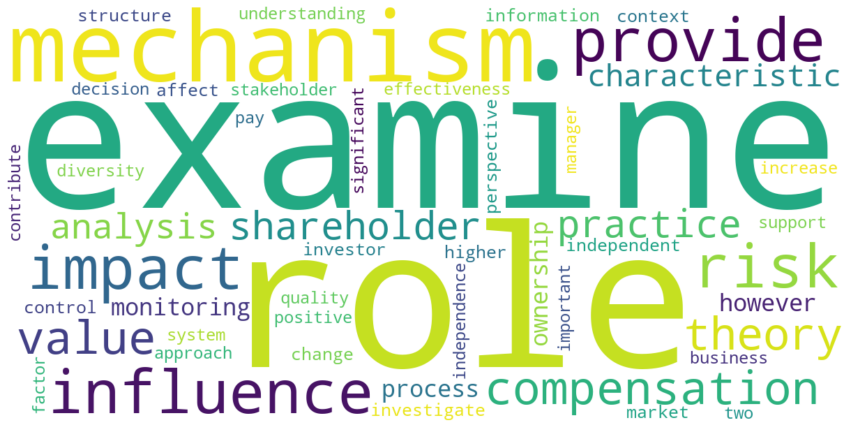

In [ ]:
# Setup a wordcloud
wc_setup = WordCloud(stopwords=stop_words, max_words=50, 
                     background_color="white", relative_scaling = 0, width = 1200, height = 600, collocations = True)
wordcloud = wc_setup.generate_from_text(" ".join(lofialph_abstracts))

# Plot the generated wordcloud using matplotlib
# Setup figure layout
plt.figure(figsize = (15, 9))
# Create plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# Show plot
plt.show()

The wordcloud shows 50 words that are frequently occured in the text corpus. As you see, tokesn are lowercased and lemmatized. Furthermore, stopwords are not contained.

We see that research activities revolve around examination, role within a business as well as risk, compensation and impact of corporate governance.

We also might conclude, that value orientation of corporate governance system and thus facilitation of economic value-adding investments are not of primary concern.

## 4) Quantitative Text Mining

We want to quantitatively assess the most common tokens and thus draw conclusions on the relative importance of topics or issues to each other.



### 4a) Fine-tune Text Corpus

In [ ]:
# Further Clean up the text corpus
token_list_cleaned = []
boring_tokens = ["board", "firm", "governance", "corporate", "director", "study", "result", "research", "find", "company", "provide", "level", "finding", 
                 "high", "influence", "paper", "literature", "sample", "country", "different", "base", "examine", "suggest"]
# Filter lofialph_abstracts using for-if-loop
for token in lofialph_abstracts:
  if token not in boring_tokens:
    token_list_cleaned.append(token) 

# Print the length of cleaned token list
print(f"The text corpus comprises {len(token_list_cleaned)} tokens")

The text corpus comprises 45222 tokens


### 4b) Quantitative Text Recording

We use `collections.Counter()`. It is a collection where elements are stored as dictionary keys and their counts are stored as dictionary values. The inputs may be negative or zero, but only outputs with positive values are created.

We call the resulting dictionary a "Bag-of-Words" (BoW). A BoW is an **unordered aggregated representation of a larger volume of text**, which can be a document, chapter, paragraph, sentence, etc…. The grammar, punctuation, and word order from the original text are ignored, the only thing that’s kept is the unique words and a number attached to them. That number can be the frequency with which the word occurs in the text, or it can be a binary 0 or 1, simply measuring whether the word is in the text or not.


In [ ]:
# Import Counter() 
from collections import Counter

# Create the bag-of-words: bow
count_abstracts = Counter(token_list_cleaned)

# Print the 10 most common tokens
print(count_abstracts.most_common(10))

[('ceo', 590), ('theory', 294), ('shareholder', 282), ('ownership', 280), ('mechanism', 241), ('risk', 240), ('compensation', 235), ('agency', 234), ('value', 229), ('market', 221)]


### 4b) BoW-Visualization

Once we created the Bag-of-Words, we are able to visualize it using `matplotlib` or in our case `seaborn` library.

Text(0.5, 1.0, 'Occurence of 30 most common Tokens')

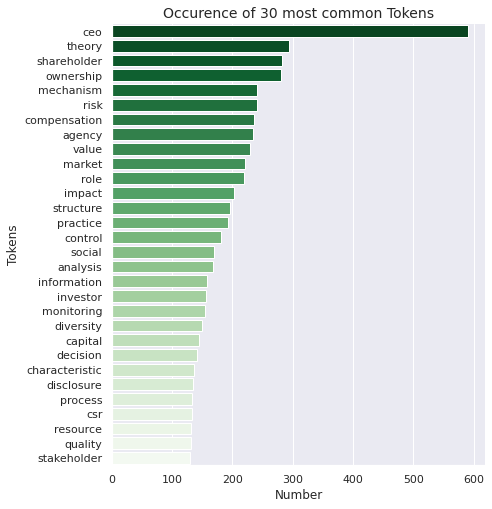

In [ ]:
# Import library
import seaborn as sns

# Create DataFrame comprising 30 most common tokens
common_words = count_abstracts.most_common(30)
df_common = pd.DataFrame(common_words, columns = ["Tokens", "Number"])

# Set up figure layout

sns.set_style("darkgrid")
sns.set_palette(palette = "Greens_r", n_colors = 30)
sns.set_context("notebook")

# Create Plot
common_plot = sns.catplot(data = df_common, x = "Number", y = "Tokens", kind = "bar", height = 7, aspect = 1);

# Add annotations
plt.title("Occurence of 30 most common Tokens", size = 14)

We can derive that research considers the CEO by far as the leading element of corporate governance systems.

Moreover, it seems that researchers evalute corporate govenrance in the context of its capital market relations (i.e. shareholders), ownership structure and risk taking behavior.


The token "value" comes at the 9. rank and therefore is somehow considered in research, but might not play a central role for the design and implementation of future corporate governance systems.

## 5) N-grams Analysis

**N-grams analyses** are often used to see which words often show up together. I often like to investigate combinations of two words or three words, i.e., Bigrams/Trigrams.

### 5a) Generating a Bi-gram WordCloud

We repeat the preprocessing steps to arrive at a wordcloud containing bigram tokens. Meaning tokesn consisting of two words.

In [ ]:
# Load libraries and packages
import nltk
import re
from wordcloud import WordCloud, STOPWORDS
nltk.download("wordnet")
nltk.download("stopwords")
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate Lemmatizer()
WNL = nltk.WordNetLemmatizer()

# Lowercase and tokenize
text = abstracts
text = text.lower()

# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")

# Tokenize text
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

#set the stopwords list
stopwords_wc = set(STOPWORDS)
customized_words = ["agency", "theory", "cost", "Corporate", "Governance", "corporate", "governance", "the", "CEO", "level", "find", "findings", "related", "paper", "listed", "CG", "effect", 
            "finding", "result", "study", "boards", "based", "board", "Board", "firm", "firms", "family", "performance", "director", "directors", "companies",
            "member", "results", "sample", "suggest", "show", "literature", "research", "model", "management", "article", "one", ".", ",", "(", ")", "The", "We", "In"
            "-", "This", "'", "Our", "’", "In", "also", "evidence", "empirical", "better", "high", "use", "country", "level", "agency theory"] # If you want to remove any particular word form text which does not contribute much in meaning

# Add customized_words to stopwords list
stopwords_wc.update(customized_words)

# Consider only non-stopwords tokens
text_content = [word for word in text_content if word not in stopwords_wc]

# After the punctuation above is removed it still leaves empty entries in the list.
text_content = [s for s in text_content if len(s) != 0]


# Lemmatization of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]


#nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))

# Print Bi-grams word tokenss
print(bigrams_list)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[('sustainabilityoriented', 'ceo'), ('ceo', 'compensation'), ('compensation', 'widely'), ('widely', 'discussed'), ('discussed', 'among'), ('among', 'policy'), ('policy', 'maker'), ('maker', 'practice'), ('practice', 'academia'), ('academia', 'date'), ('date', 'yielded'), ('yielded', 'growing'), ('growing', 'body'), ('body', 'determinant'), ('determinant', 'effect'), ('effect', 'sustainable'), ('sustainable', 'ceo'), ('ceo', 'compensation'), ('compensation', 'primarily'), ('primarily', 'study'), ('study', 'analyze'), ('analyze', 'whether'), ('whether', 'extent'), ('extent', 'sustainabilityrelated'), ('sustainabilityrelated', 'issue'), ('issue', 'determine'), ('determine', 'design'), ('design', 'sustainable'), ('sustainable', 'ceo'), ('ceo', 'compensation'),

In [ ]:
# Turn tuples into strings
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print(dictionary2)

['sustainabilityoriented ceo', 'ceo compensation', 'compensation widely', 'widely discussed', 'discussed among', 'among policy', 'policy maker', 'maker practice', 'practice academia', 'academia date', 'date yielded', 'yielded growing', 'growing body', 'body determinant', 'determinant effect', 'effect sustainable', 'sustainable ceo', 'ceo compensation', 'compensation primarily', 'primarily study', 'study analyze', 'analyze whether', 'whether extent', 'extent sustainabilityrelated', 'sustainabilityrelated issue', 'issue determine', 'determine design', 'design sustainable', 'sustainable ceo', 'ceo compensation', 'compensation sustainabilityoriented', 'sustainabilityoriented ceo', 'ceo compensation', 'compensation impact', 'impact scattered', 'scattered nature', 'nature field', 'field impeded', 'impeded overarching', 'overarching substantiation', 'substantiation argument', 'argument favor', 'favor sustainable', 'sustainable ceo', 'ceo compensation', 'compensation structured', 'structured r

In [ ]:
# Remove unwanted bigrams
bigram_stops = ["widely discussed", "country level", "firm level", "country level", "country", "level", "firm"]
dictionary3 = [bigram for bigram in dictionary2 if bigram not in bigram_stops]
print(dictionary3)

['sustainabilityoriented ceo', 'ceo compensation', 'compensation widely', 'discussed among', 'among policy', 'policy maker', 'maker practice', 'practice academia', 'academia date', 'date yielded', 'yielded growing', 'growing body', 'body determinant', 'determinant effect', 'effect sustainable', 'sustainable ceo', 'ceo compensation', 'compensation primarily', 'primarily study', 'study analyze', 'analyze whether', 'whether extent', 'extent sustainabilityrelated', 'sustainabilityrelated issue', 'issue determine', 'determine design', 'design sustainable', 'sustainable ceo', 'ceo compensation', 'compensation sustainabilityoriented', 'sustainabilityoriented ceo', 'ceo compensation', 'compensation impact', 'impact scattered', 'scattered nature', 'nature field', 'field impeded', 'impeded overarching', 'overarching substantiation', 'substantiation argument', 'argument favor', 'favor sustainable', 'sustainable ceo', 'ceo compensation', 'compensation structured', 'structured review', 'review addr

In [ ]:
# Instantiate CountVectorizer() to view the frequency of only bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Fit and transform the dictionary3
bow_abstracts = vectorizer.fit_transform(dictionary3)

# Create Bag-of-Words of Bi-gram Tokens
# .vocabulary_ is a dict where keys are terms and values are indices in the feature matrix
vectorizer.vocabulary_

# Sum up the bi-gram tokens
sum_words = bow_abstracts.sum(axis=0)
 
# Get bi-gram frequencies
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:100])


[('decision making', 63), ('ownership structure', 61), ('ceo compensation', 53), ('ownership concentration', 52), ('firm level', 46), ('executive compensation', 45), ('risk taking', 45), ('country level', 44), ('ceo duality', 40), ('gender diversity', 40), ('policy maker', 37), ('financial reporting', 37), ('human capital', 37), ('audit committee', 36), ('information asymmetry', 35), ('non executive', 34), ('controlling shareholder', 33), ('financial crisis', 32), ('and or', 32), ('investor protection', 30), ('cash flow', 30), ('resource dependence', 30), ('social responsibility', 29), ('internal control', 29), ('ceo pay', 29), ('panel data', 28), ('emerging market', 28), ('long term', 27), ('stock market', 26), ('non family', 26), ('institutional investor', 25), ('stock exchange', 25), ('resource provision', 24), ('female representation', 24), ('social capital', 23), ('executive officer', 23), ('ceo power', 23), ('chief executive', 22), ('different type', 22), ('publicly traded', 20),

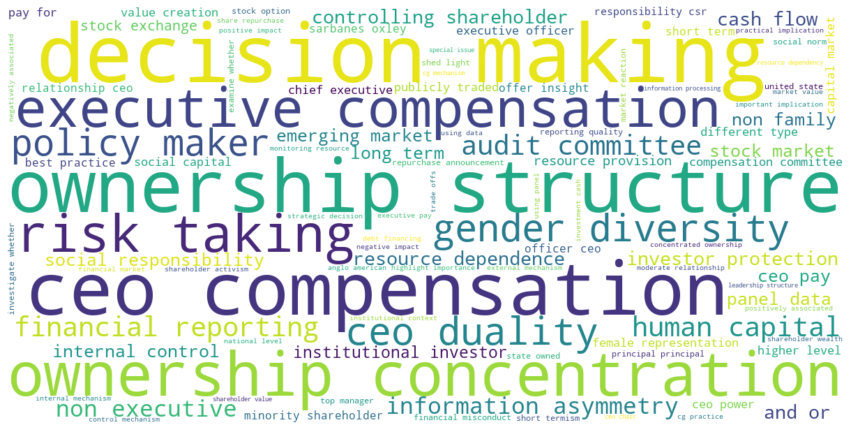

In [ ]:
import random
# Generating wordcloud and saving as jpg image
wc_setup = WordCloud(max_words = 100, height = 600, width = 1200, stopwords = stopwords_wc, background_color = "white", 
                     relative_scaling = 0, collocations = True)

# Create a dictionary
abstracts_dict = dict(words_freq)

# Delete country level and firm level
del abstracts_dict["country level"]
del abstracts_dict["firm level"]
del abstracts_dict["financial crisis"]
del abstracts_dict["2010 2014"]

# Generate bi-gram wordcloud
wordcloud = wc_setup.generate_from_frequencies(abstracts_dict)
plt.figure(figsize = (15, 9))

# plt.title('Most frequently occurring topics in the context of corporate governance', fontsize = 20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This time, the wordcloud allows for more understanding of corporate governance research. CEOs are primarily investigated in the context of their compensation- CG is assessed based on ownership structure, decision making procedures and risk taking behavior. Moreover, gender diversity plays an important role when we look at corporate governance systems.

### 5b) Quantitative Recording of Bi-grams

In [ ]:
# Import pandas library
import pandas as pd

# Create DataFrame
df_words_freq = pd.DataFrame(words_freq, columns = ["Terminology", "Occurrence"])

# Sort DataFrame
df_sorted = df_words_freq.sort_values(by = "Occurrence", ascending = False)

# Delete meaningless terms
meaningless = ["firm level", "country level", "cross national", "and or", "panel data", "positively associated", "european country", 
               "2010 2014", "non executive", "cash flow", "resource dependence", "short term", "different type", "offer insight", "emerging market",
               "human capital", "principal principal", "pay for", "relationship ceo", "long term", "social norm", "investment cash", 
               "trade offs", "state owned", "anglo american", "national level", "non family", "executive officer", "chief executive",
               "publicly traded", "higher level", "united state", "highlight importance", "examine whether", "best practice", "negative impact", 
               "using data", "investigate whether", "shed light", "practical implication", "say on", "lone insider", "special issue",
               "ceo board", "ceo chair", "le likely", "on pay", "using panel", "negatively associated", "officer ceo", "information processing",
               "important implication", "examines relationship", "positive impact", "theoretical framework", "moderating effect",
               "top manager", "institutional context"]

# Filter out meaningless terminologies
df_relevant = df_sorted[~df_sorted["Terminology"].isin(meaningless)]

# Define new DataFrame with 30 most common terms and print it out
df_common = df_relevant.head(20)
# View most common Bi-grams
print(df_common)

                Terminology  Occurrence
0           decision making          63
1       ownership structure          61
2          ceo compensation          53
3   ownership concentration          52
5    executive compensation          45
6               risk taking          45
8               ceo duality          40
9          gender diversity          40
10             policy maker          37
11      financial reporting          37
13          audit committee          36
14    information asymmetry          35
16  controlling shareholder          33
17         financial crisis          32
19      investor protection          30
24                  ceo pay          29
22    social responsibility          29
23         internal control          29
28             stock market          26
30   institutional investor          25


**Visualization of Bi-gram Countplot**

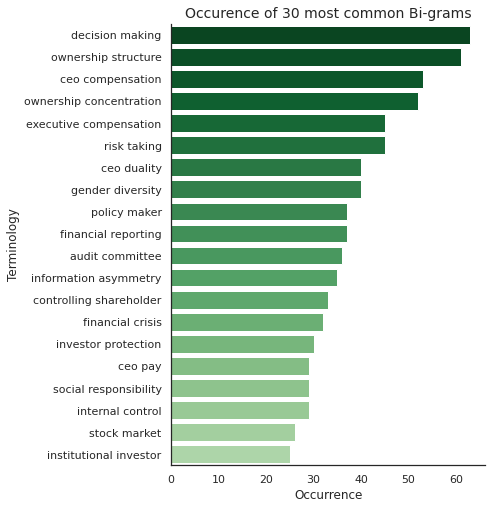

In [ ]:
# Import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# Setup figure layout
sns.set_style("white")
sns.set_palette(palette = "Greens_r", n_colors = 30)
sns.set_context("notebook")

# Create plot
df_common_plot = sns.catplot(data = df_common, x = "Occurrence", y = "Terminology", kind = "bar", height = 7)

# Add annotations
plt.xlabel("Occurrence")
plt.ylabel("Terminology")
plt.title("Occurence of 30 most common Bi-grams", size = 14);

### 5c) Enhanced Barplot

We still have noise in terms of synonym bi-gram tokens in the text. Therefore, we find similar expressions and replace them. For example, "ceo" and "executive" can be replaced with "executive.


- "ceo compensation" & "executive compensation", "ceo pay", "executive pay" -> **"executive compensation"**
- "ownership structure" & "ownership concentration" & "concentrated ownership" -> **"ownership structure"**
- "gender diversity" & "female representation" -> "gender diversity"
- "financial reporting" & "reporting quality" & "information asymmetry" & "audit committee" -> **"reporting quality"**
- "control mechanism" & "internal control" -> **"control mechanism"**
- "shareholder activism" & "controlling shareholder" -> **"shareholder activities"**
- "social responsibility" & "responsibility csr" -> **"corporate social responsibility"**
- "share repurchase" & "repurchase announcement" -> **"share repurchase"**





In [ ]:
# Master term: executive compensation
df_relevant["Terminology"] = df_relevant["Terminology"].replace("ceo compensation", "executive compensation")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("ceo pay", "executive compensation")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("executive pay", "executive compensation")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("compensation structure", "executive compensation")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("compensation gap", "executive compensation")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("compensation committee", "executive compensation")

# Master term: ownership structure
df_relevant["Terminology"] = df_relevant["Terminology"].replace("ownership structure", "ownership structure")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("ownership concentration", "ownership structure")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("concentrated ownership", "ownership structure")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("leadership structure", "ownership structure")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("ownership type", "ownership structure")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("foreign ownership", "ownership structure")

# Master term: decision making
df_relevant["Terminology"] = df_relevant["Terminology"].replace("strategic decision", "decision making")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("investment decision", "decision making")

# Master term: risk taking
df_relevant["Terminology"] = df_relevant["Terminology"].replace("risk culture", "risk taking")

# Master term: diversity
df_relevant["Terminology"] = df_relevant["Terminology"].replace("female representation", "diversity")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("committee member", "diversity")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("female ceo", "diversity")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("gender diversity", "diversity")

# Master term: reporting quality
df_relevant["Terminology"] = df_relevant["Terminology"].replace("financial reporting", "reporting quality")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("information asymmetry", "reporting quality")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("audit committee", "reporting quality")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("disclosure quality", "reporting quality")

# Master term: control mechanism
df_relevant["Terminology"] = df_relevant["Terminology"].replace("internal control", "control mechanism")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("internal mechanism", "control mechanism")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("cg mechanism", "control mechanism")

# Master term: shareholder activities
df_relevant["Terminology"] = df_relevant["Terminology"].replace("shareholder activism", "shareholder activities")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("controlling shareholder", "shareholder activities")

# Master term: corporate social responsibility
df_relevant["Terminology"] = df_relevant["Terminology"].replace("social responsibility", "corporate social responsibility")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("responsibility csr", "corporate social responsibility")

# Master term: share repurchase
df_relevant["Terminology"] = df_relevant["Terminology"].replace("repurchase announcement", "share repurchase")

# Master term: capital market
df_relevant["Terminology"] = df_relevant["Terminology"].replace("stock market", "capital market")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("stock exchange", "capital market")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("financial market", "capital market")

# Master term: financial misconduct
df_relevant["Terminology"] = df_relevant["Terminology"].replace("financial crisis", "financial misconduct")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("investor protection", "financial misconduct")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("value destroying", "financial misconduct")

# Master term: regulatory policy
df_relevant["Terminology"] = df_relevant["Terminology"].replace("sarbanes oxley", "regulatory policy")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("policy maker", "regulatory policy")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("policy makers", "regulatory policy")

# Master term: economic value
df_relevant["Terminology"] = df_relevant["Terminology"].replace("value creation", "economic value")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("shareholder value", "economic value")
df_relevant["Terminology"] = df_relevant["Terminology"].replace("shareholder wealth", "economic value")

df_relevant.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Terminology  Occurrence
0          decision making          63
1      ownership structure          61
2   executive compensation          53
3      ownership structure          52
5   executive compensation          45
6              risk taking          45
8              ceo duality          40
9                diversity          40
10       regulatory policy          37
11       reporting quality          37

**Aggregate df based on "Terminology"**

In [ ]:
# Group by "Terminology"
df_relevant = df_relevant.groupby(by = "Terminology").sum()

# Sort values in descending order
df_relevant = df_relevant.sort_values(by = "Occurrence", ascending = False).reset_index()

# Subset dataframe
df_rel_common = df_relevant.head(30)

# View first rows
df_rel_common.head()

Terminology  Occurrence
0  executive compensation         180
1     ownership structure         162
2       reporting quality         135
3    financial misconduct          90
4         decision making          87

**Create Countplot**

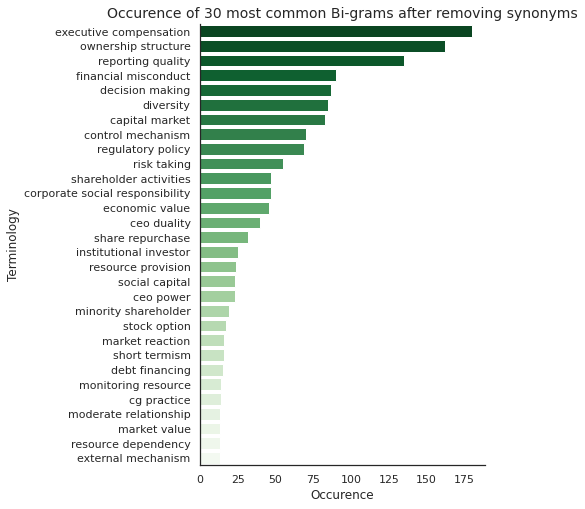

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Customize layout
sns.set_style("white")
sns.set_palette(palette = "Greens_r", n_colors = 30)
sns.set_context("notebook")

# Create plot
relevant_plot = sns.catplot(data = df_rel_common, x = "Occurrence", y = "Terminology", kind = "bar", height = 7)

# Add annotations
plt.xlabel("Occurence")
plt.ylabel("Terminology")
plt.title("Occurence of 30 most common Bi-grams after removing synonyms", size = 14);

This final Bi-gram Barplot provides even more insights compared to the analyses above. We see that executive compensation is by far the most relevant topic researchers currently deal with and is of central importance when it comes to corporate governance systems.

Moreover, economic value creation does play a minor role and is deprioritized in costs of financial misconduct, reporting quality, decision making and risk taking.

Therefore, we might conclude that corporate governance is imbalanced and more attached to risk avoiding and compliance maximizing behavior. Economic-value creation addressed by streamlined investment procedures initiiated by corporate governance has not yet reached its visibility at senior management level of public companies.